![alt text]({C631ADA0-FD03-493A-A0AA-A13177C75887}.png)

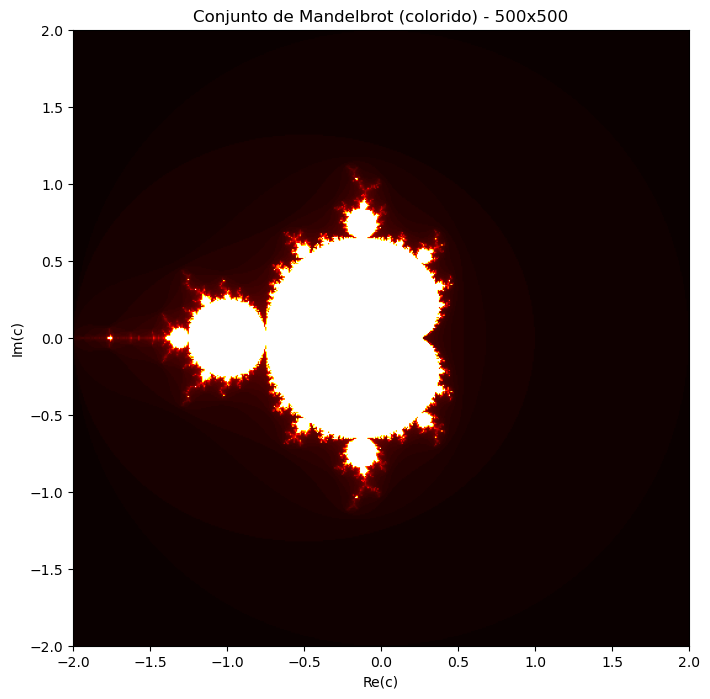

In [1]:
#Exercicio 3.7

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N = 500  # resolução da imagem (quanto maior, mais detalhado)
max_iter = 100  # número máximo de iterações
colorido = True  # True para imagem colorida, False para preto e branco

# Limites do plano complexo
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0

# Criando grade de pontos complexos
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
imagem = np.zeros((N, N))  # matriz para armazenar resultados

# Loop principal para cada ponto c = x + iy
for i in range(N):
    for j in range(N):
        cx = x[j]
        cy = y[i]
        c = complex(cx, cy)
        z = 0
        n = 0
        while abs(z) <= 2 and n < max_iter:
            z = z*z + c
            n += 1
        imagem[i, j] = n  # salva número de iterações

# Plotando a imagem
plt.figure(figsize=(8, 8))

if colorido:
    plt.imshow(imagem, extent=(x_min, x_max, y_min, y_max), cmap='hot')
    plt.title(f'Conjunto de Mandelbrot (colorido) - {N}x{N}')
else:
    bw = imagem == max_iter
    plt.imshow(bw, extent=(x_min, x_max, y_min, y_max), cmap='binary')
    plt.title(f'Conjunto de Mandelbrot (preto e branco) - {N}x{N}')

plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()


![Fluxo](<image copy.png>)

![Questão 2]({699709D6-5CB0-4DA0-A7D7-9BFD2123252D}.png)

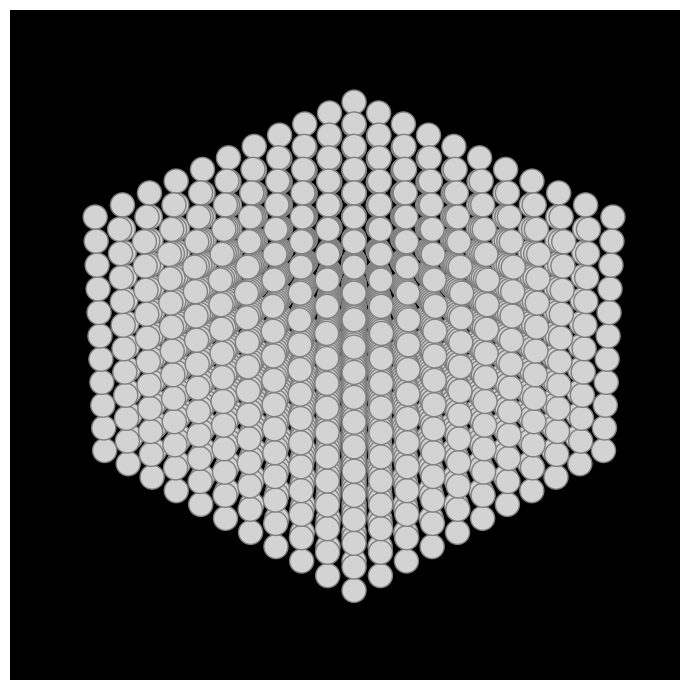

In [4]:
#Exercicio 3.2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 5

# Gerar coordenadas dos átomos
x, y, z = [], [], []
for i in range(-L, L+1):
    for j in range(-L, L+1):
        for k in range(-L, L+1):
            x.append(i)
            y.append(j)
            z.append(k)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d', facecolor='black')
ax.scatter(x, y, z, s=300, c='lightgray', edgecolors='gray', alpha=1)

# Remover grades e eixos
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.set_axis_off()

# Ajustar limites para centralizar
ax.set_xlim([-L-1, L+1])
ax.set_ylim([-L-1, L+1])
ax.set_zlim([-L-1, L+1])

# Definir ângulo de visualização para 3D
ax.view_init(elev=30, azim=45)  # Você pode mudar esses valores para outros ângulos

plt.tight_layout()
plt.show()

![Questão 3]({DA8F35DE-7DE8-4896-BFB7-D3778DAA8BE7}.png)

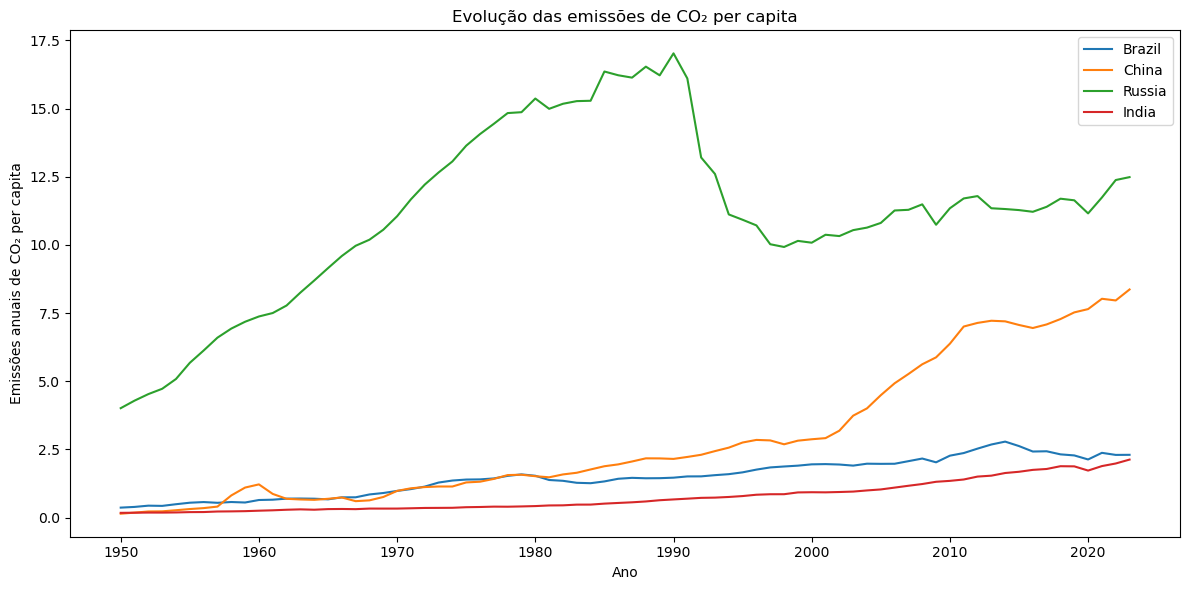

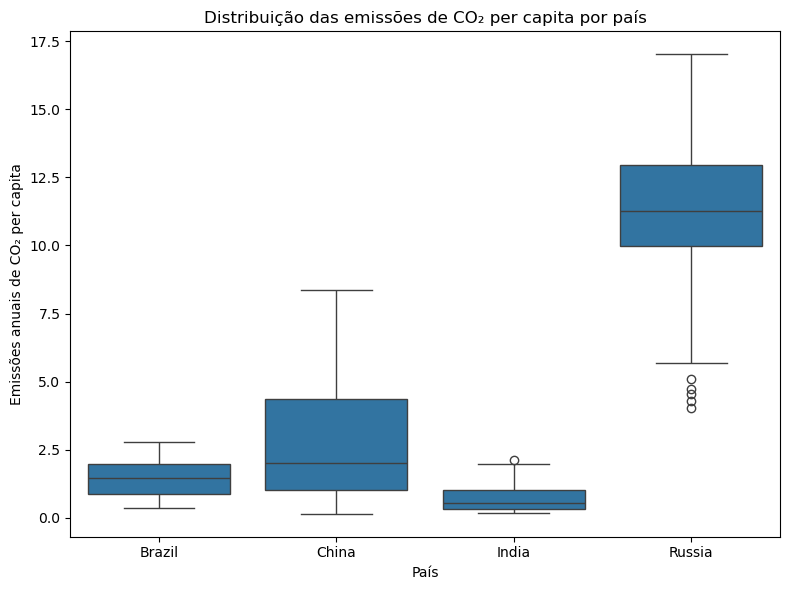

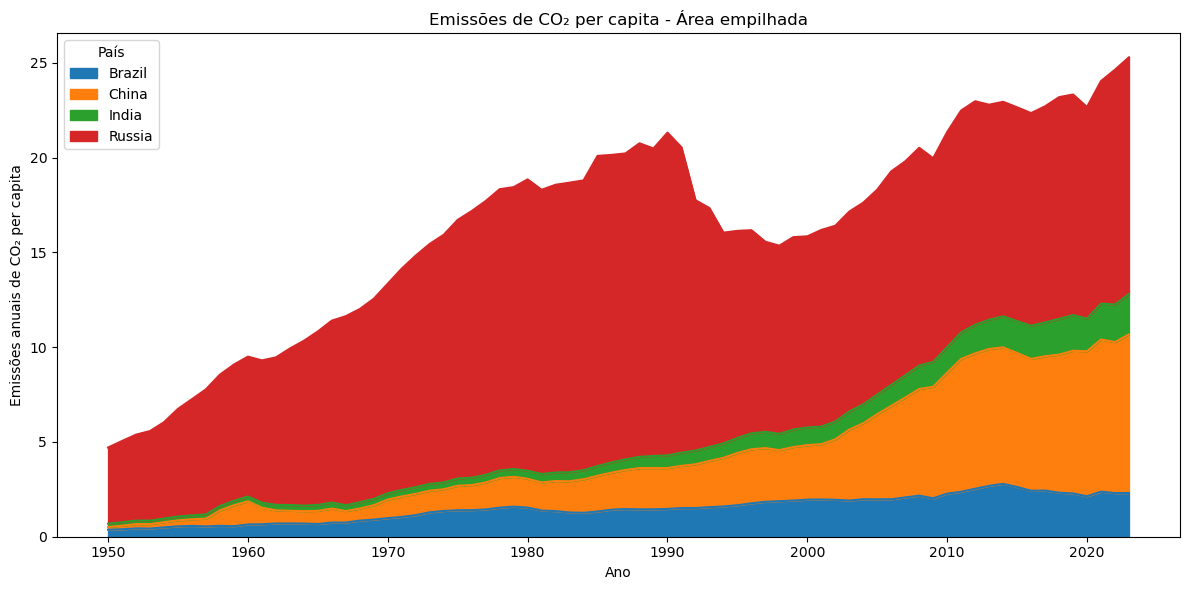

C:\Users\gustavo.florencio\AppData\Local\Temp\ipykernel_14764\834552311.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Carregar os dados
df = pd.read_csv('per-capita-co-emissions.csv')

# 2. Selecionar os países de interesse
paises = ['Brazil', 'China', 'Russia', 'India']
df_sel = df[df['Entity'].isin(paises)]

# 3. Gráfico de linha temporal múltipla
plt.figure(figsize=(12,6))
for pais in paises:
    plt.plot(df_sel[df_sel['Entity'] == pais]['Year'],
             df_sel[df_sel['Entity'] == pais]['Annual CO₂ emissions (per capita)'],
             label=pais)
plt.xlabel('Ano')
plt.ylabel('Emissões anuais de CO₂ per capita')
plt.title('Evolução das emissões de CO₂ per capita')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Boxplot comparando as distribuições por país
plt.figure(figsize=(8,6))
sns.boxplot(x='Entity', y='Annual CO₂ emissions (per capita)', data=df_sel)
plt.title('Distribuição das emissões de CO₂ per capita por país')
plt.xlabel('País')
plt.ylabel('Emissões anuais de CO₂ per capita')
plt.tight_layout()
plt.show()

# 5. Gráfico de dispersão interativo (Plotly)
fig = px.scatter(df_sel, x='Year', y='Annual CO₂ emissions (per capita)', color='Entity',
                 title='Emissões de CO₂ per capita ao longo do tempo',
                 hover_data=['Entity', 'Year'])
fig.show()

# 6. Gráfico de área empilhada
df_pivot = df_sel.pivot(index='Year', columns='Entity', values='Annual CO₂ emissions (per capita)')
df_pivot.fillna(0, inplace=True)
df_pivot.plot.area(figsize=(12,6))
plt.title('Emissões de CO₂ per capita - Área empilhada')
plt.xlabel('Ano')
plt.ylabel('Emissões anuais de CO₂ per capita')
plt.legend(title='País')
plt.tight_layout()
plt.show()

# 7. Mapa de cor (choropleth) para um ano específico (ex: 2023)
ano_escolhido = 2023
df_ano = df_sel[df_sel['Year'] == ano_escolhido]
# Ajustar nomes para plotly
df_ano['Entity'] = df_ano['Entity'].replace({'Brazil':'Brazil', 'China':'China', 'Russia':'Russia', 'India':'India'})
fig = px.choropleth(df_ano, locations='Entity', locationmode='country names',
                    color='Annual CO₂ emissions (per capita)',
                    color_continuous_scale='Reds',
                    title=f'Emissões de CO₂ per capita em {ano_escolhido}')
fig.show()

